# Lab-2.1: Assignment
`Gathering text data with an API`

**IMPORTANT:** The lab shown here (on the website) is just an HTML version, included for reference. To download the assignment, please navigate to the Labs tab in the Share-point dropdown menu in the website’s navigation bar. The relevant assignment can be determined from the folder’s name, click on the three dots & select download to get the assignment.

**NOTE**: It is recommended that you complete this `.ipynb` file in VS-code. 

`Submission:`

* Export the completed assignment to HTML or PDF (preferably with Quarto) and upload it to Canvas.
* The final uploaded version should NOT have any code-errors present
* All outputs must be visible in the uploaded version, including code-cell outputs, images, graphs, etc

## Assignment-1: 

* Read over the `News-API`, `Wikipedia API`, and `Google Scholar` API sections in the lab-demonstration section, if you have not done so already. 
  * [https://jfh.georgetown.domains/dsan5000/](https://jfh.georgetown.domains/dsan5000/)
* Get an API key for the `News-API`: [see following link](https://newsapi.org/docs/get-started)
* **Submission**: Insert your API key below 

In [1]:
API_KEY='6f3d3278d4fe4915b3cb9a76f4f47ccc'

## Assignment-2: 

* Use the provided `News-API` code as a starting point 
* Select `THREE` random topics (e.g. Georgetown, Cats, Clouds) but choose whatever you like 
* Query the API to pull text data and store the results in three different dictionaries 
* Extract the `title` and `description` text and store for later processing (up to you how you do this)
* Clean the text as needed 

In [2]:
import requests
import json
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
baseURL = "https://newsapi.org/v2/everything?"
total_requests=2
verbose=True

# THIS CODE WILL NOT WORK UNLESS YOU INSERT YOUR API KEY IN THE NEXT LINE
API_KEY='6f3d3278d4fe4915b3cb9a76f4f47ccc'
TOPIC=['Premier_League','South_Korea','North_Korea']

In [4]:
for i in TOPIC:
    j = 0
    URLpost = {'apiKey': API_KEY,
                'q': '+'+ i,
                'sortBy': 'relevancy',
                'totalRequests': 1}

    #print(baseURL)
    # print(URLpost)

    #GET DATA FROM API
    response = requests.get(baseURL, URLpost) #request data from the server
    # print(response.url);  
    exec(f'article_{i} = response.json()') #extract txt data from request into json

In [12]:
article_North_Korea['articles'][1]['title'] + article_North_Korea['articles'][1]['description']

'North Korea says second satellite launch this year failedSEOUL -- North Korea has conducted another unsuccessful attempt at launching a satellite, state media said, citing a problem with the rocket. The launch attempt took place in the early hours of Thursday and prompted emergency alerts in Japan. Pyongyang had ea…'

In [5]:
def string_cleaner(input_string):
    try: 
        out=re.sub(r"""
                    [,.;@#?!&$-]+  # Accept one or more copies of punctuation
                    \ *           # plus zero or more copies of a space,
                    """,
                    " ",          # and replace it with a single space
                    input_string, flags=re.VERBOSE)

        #REPLACE SELECT CHARACTERS WITH NOTHING
        out = re.sub('[’.]+', '', input_string)

        #ELIMINATE DUPLICATE WHITESPACES USING WILDCARDS
        out = re.sub(r'\s+', ' ', out)

        #CONVERT TO LOWER CASE
        out=out.lower()
    except:
        print("ERROR")
        out=''
    return out

In [13]:
def td_list(dictionary):

    article_list = []

    for i in range(len(dictionary['articles'])):
        words = string_cleaner(dictionary['articles'][i]['title']+dictionary['articles'][i]['description'])
        
        article_list.append(words)
    
    return article_list

In [6]:
def td_dict(dictionary):

    article_dictionary = {}

    for i in range(len(dictionary['articles'])):
        title = string_cleaner(dictionary['articles'][i]['title'])
        description = string_cleaner(dictionary['articles'][i]['description'])
        
        article_dictionary.update({title:description})
    
    return article_dictionary

In [14]:
a = td_list(article_North_Korea)
b = td_list(article_South_Korea)
c = td_list(article_Premier_League)

## Assignment-3: 

* Use the provided `Wikipedia-API` code as a starting point 
* For EACH `THREE` of the random topics, create a word cloud for your cleaned  `title` and `description` text 

In [15]:
def generate_word_cloud(my_text):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    # exit()
    # Import package
    # Define a function to plot word cloud
    def plot_cloud(wordcloud):
        # Set figure size
        plt.figure(figsize=(40, 30))
        # Display image
        plt.imshow(wordcloud) 
        # No axis details
        plt.axis("off");

    # Generate word cloud
    wordcloud = WordCloud(
        width = 3000,
        height = 2000, 
        random_state=1, 
        background_color='salmon', 
        colormap='Pastel1', 
        collocations=False,
        stopwords = STOPWORDS).generate(my_text)
    plot_cloud(wordcloud)
    plt.show()

In [22]:
North_Korea = str()
for key in a:
    North_Korea += key

South_Korea = str()
for key in b:
    South_Korea += key

Premier_League = str()
for key in c:
    Premier_League += key

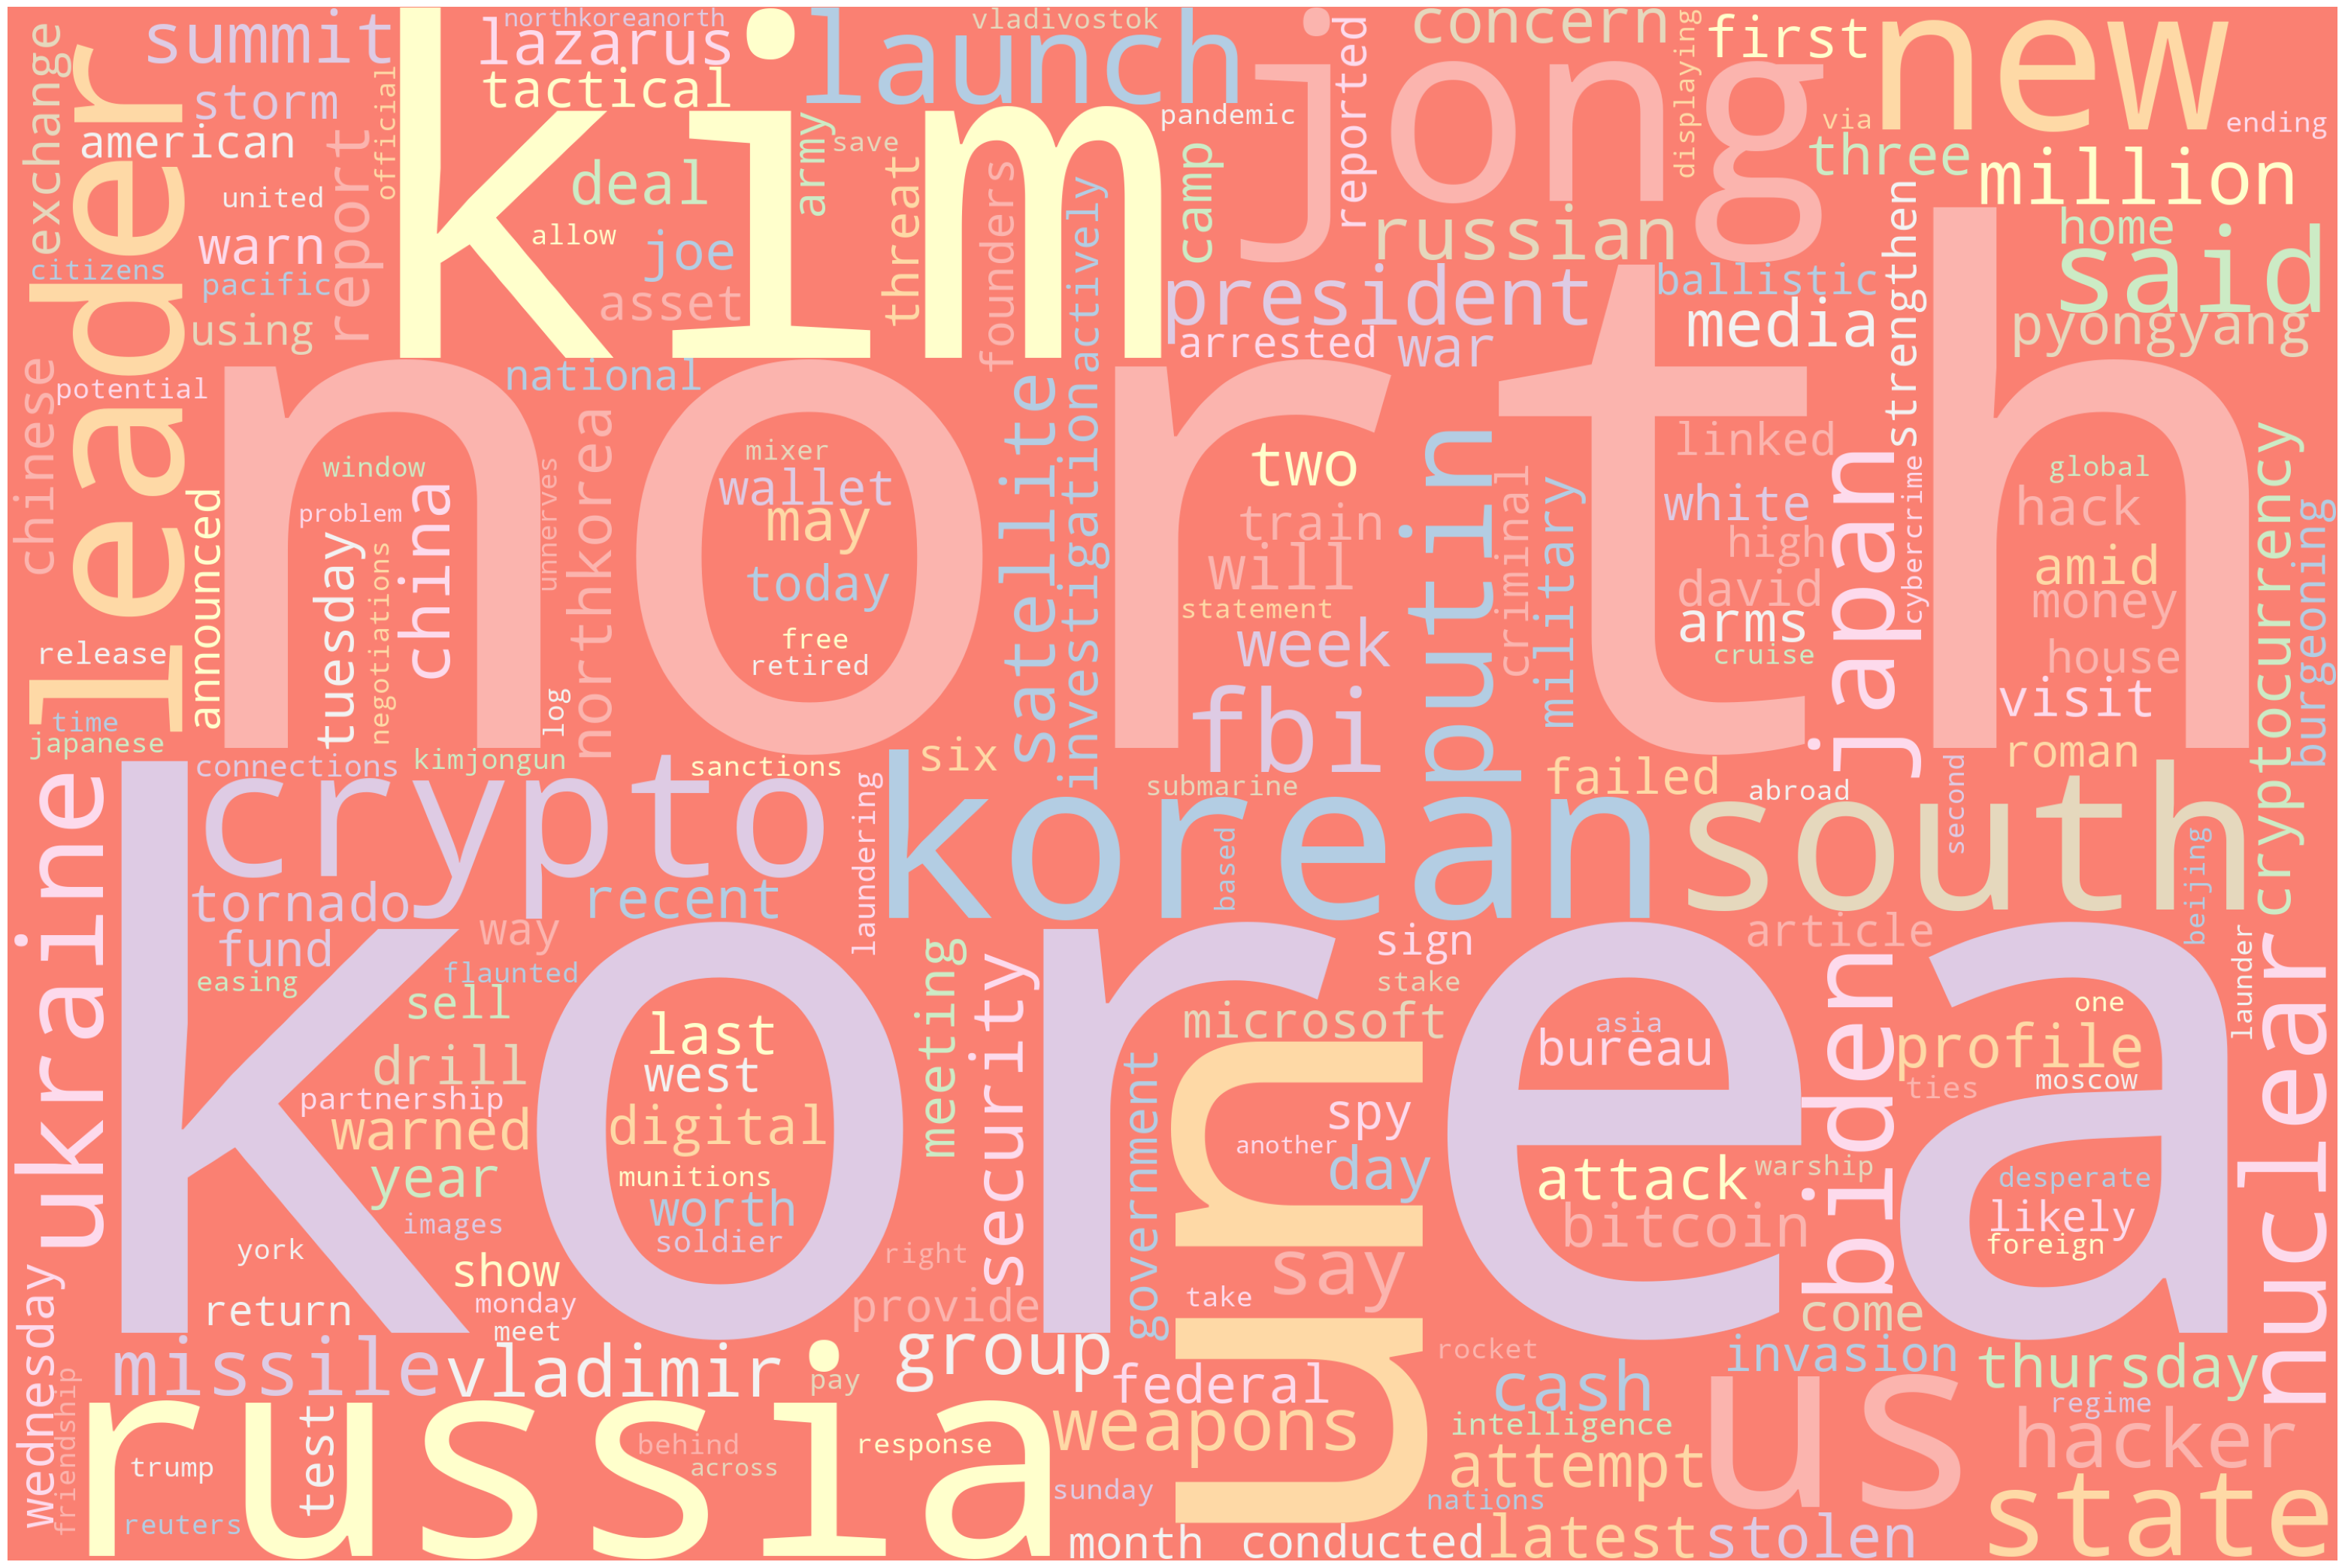

In [18]:
generate_word_cloud(North_Korea)

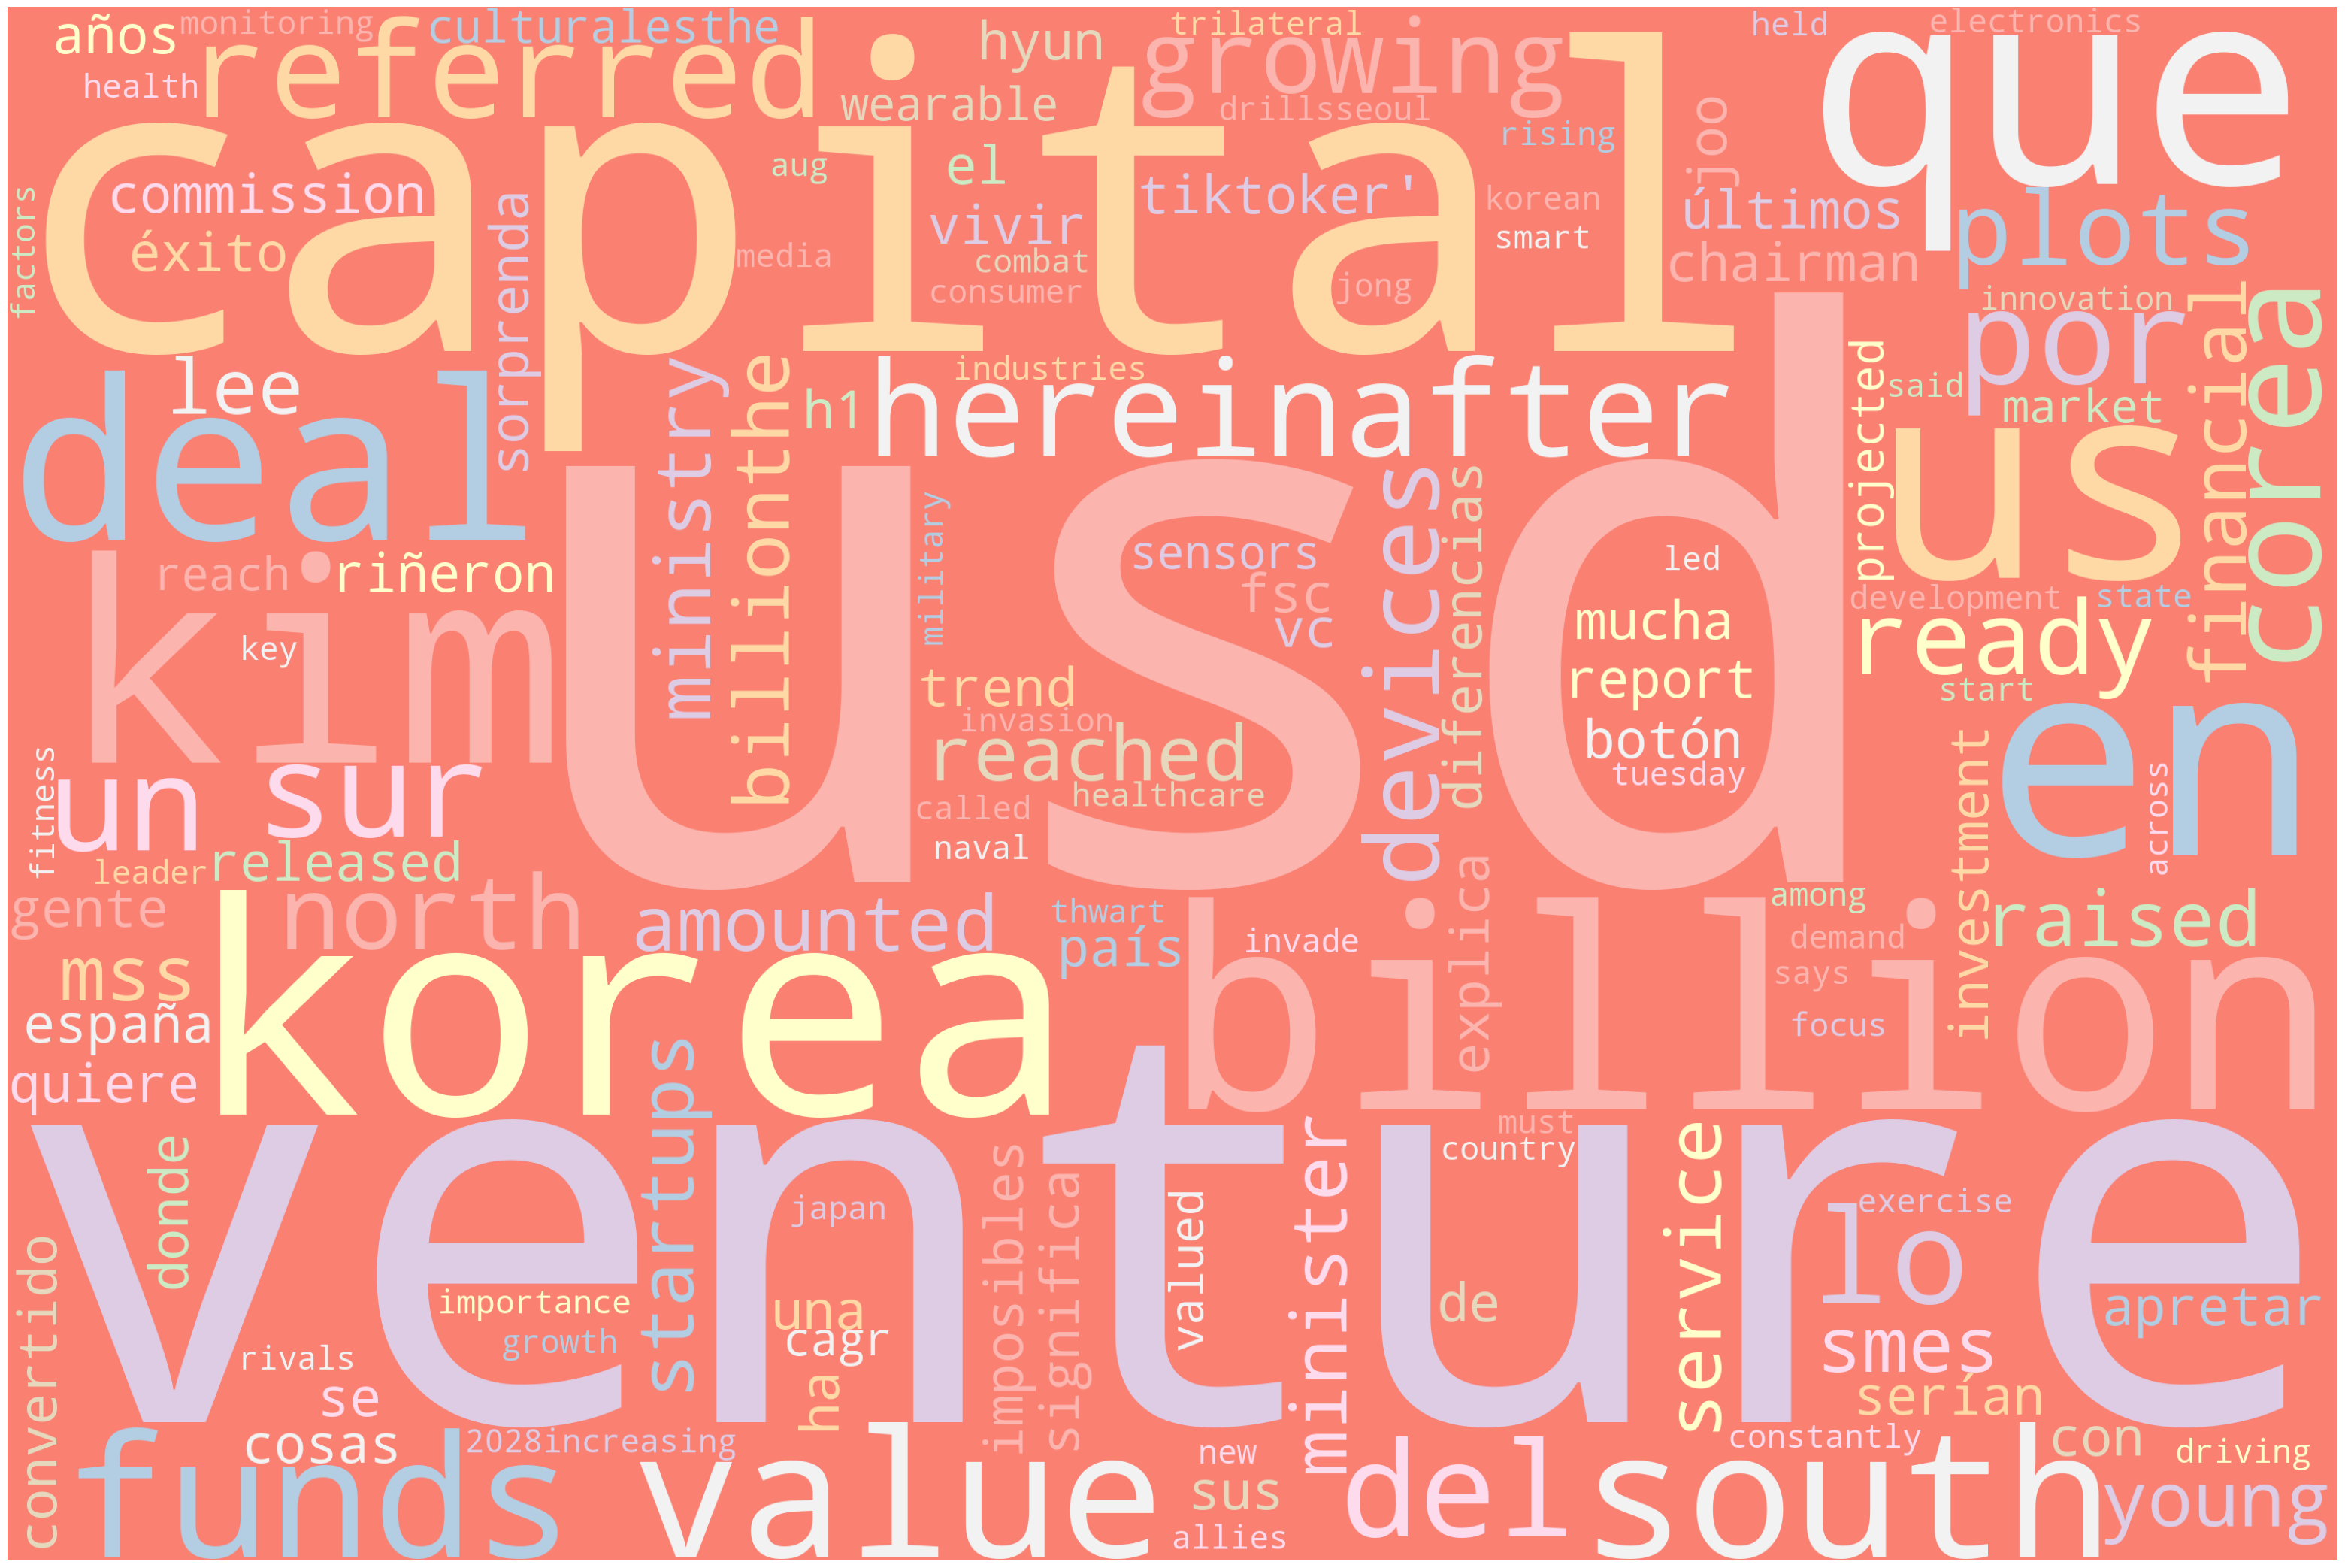

In [20]:
generate_word_cloud(South_Korea)

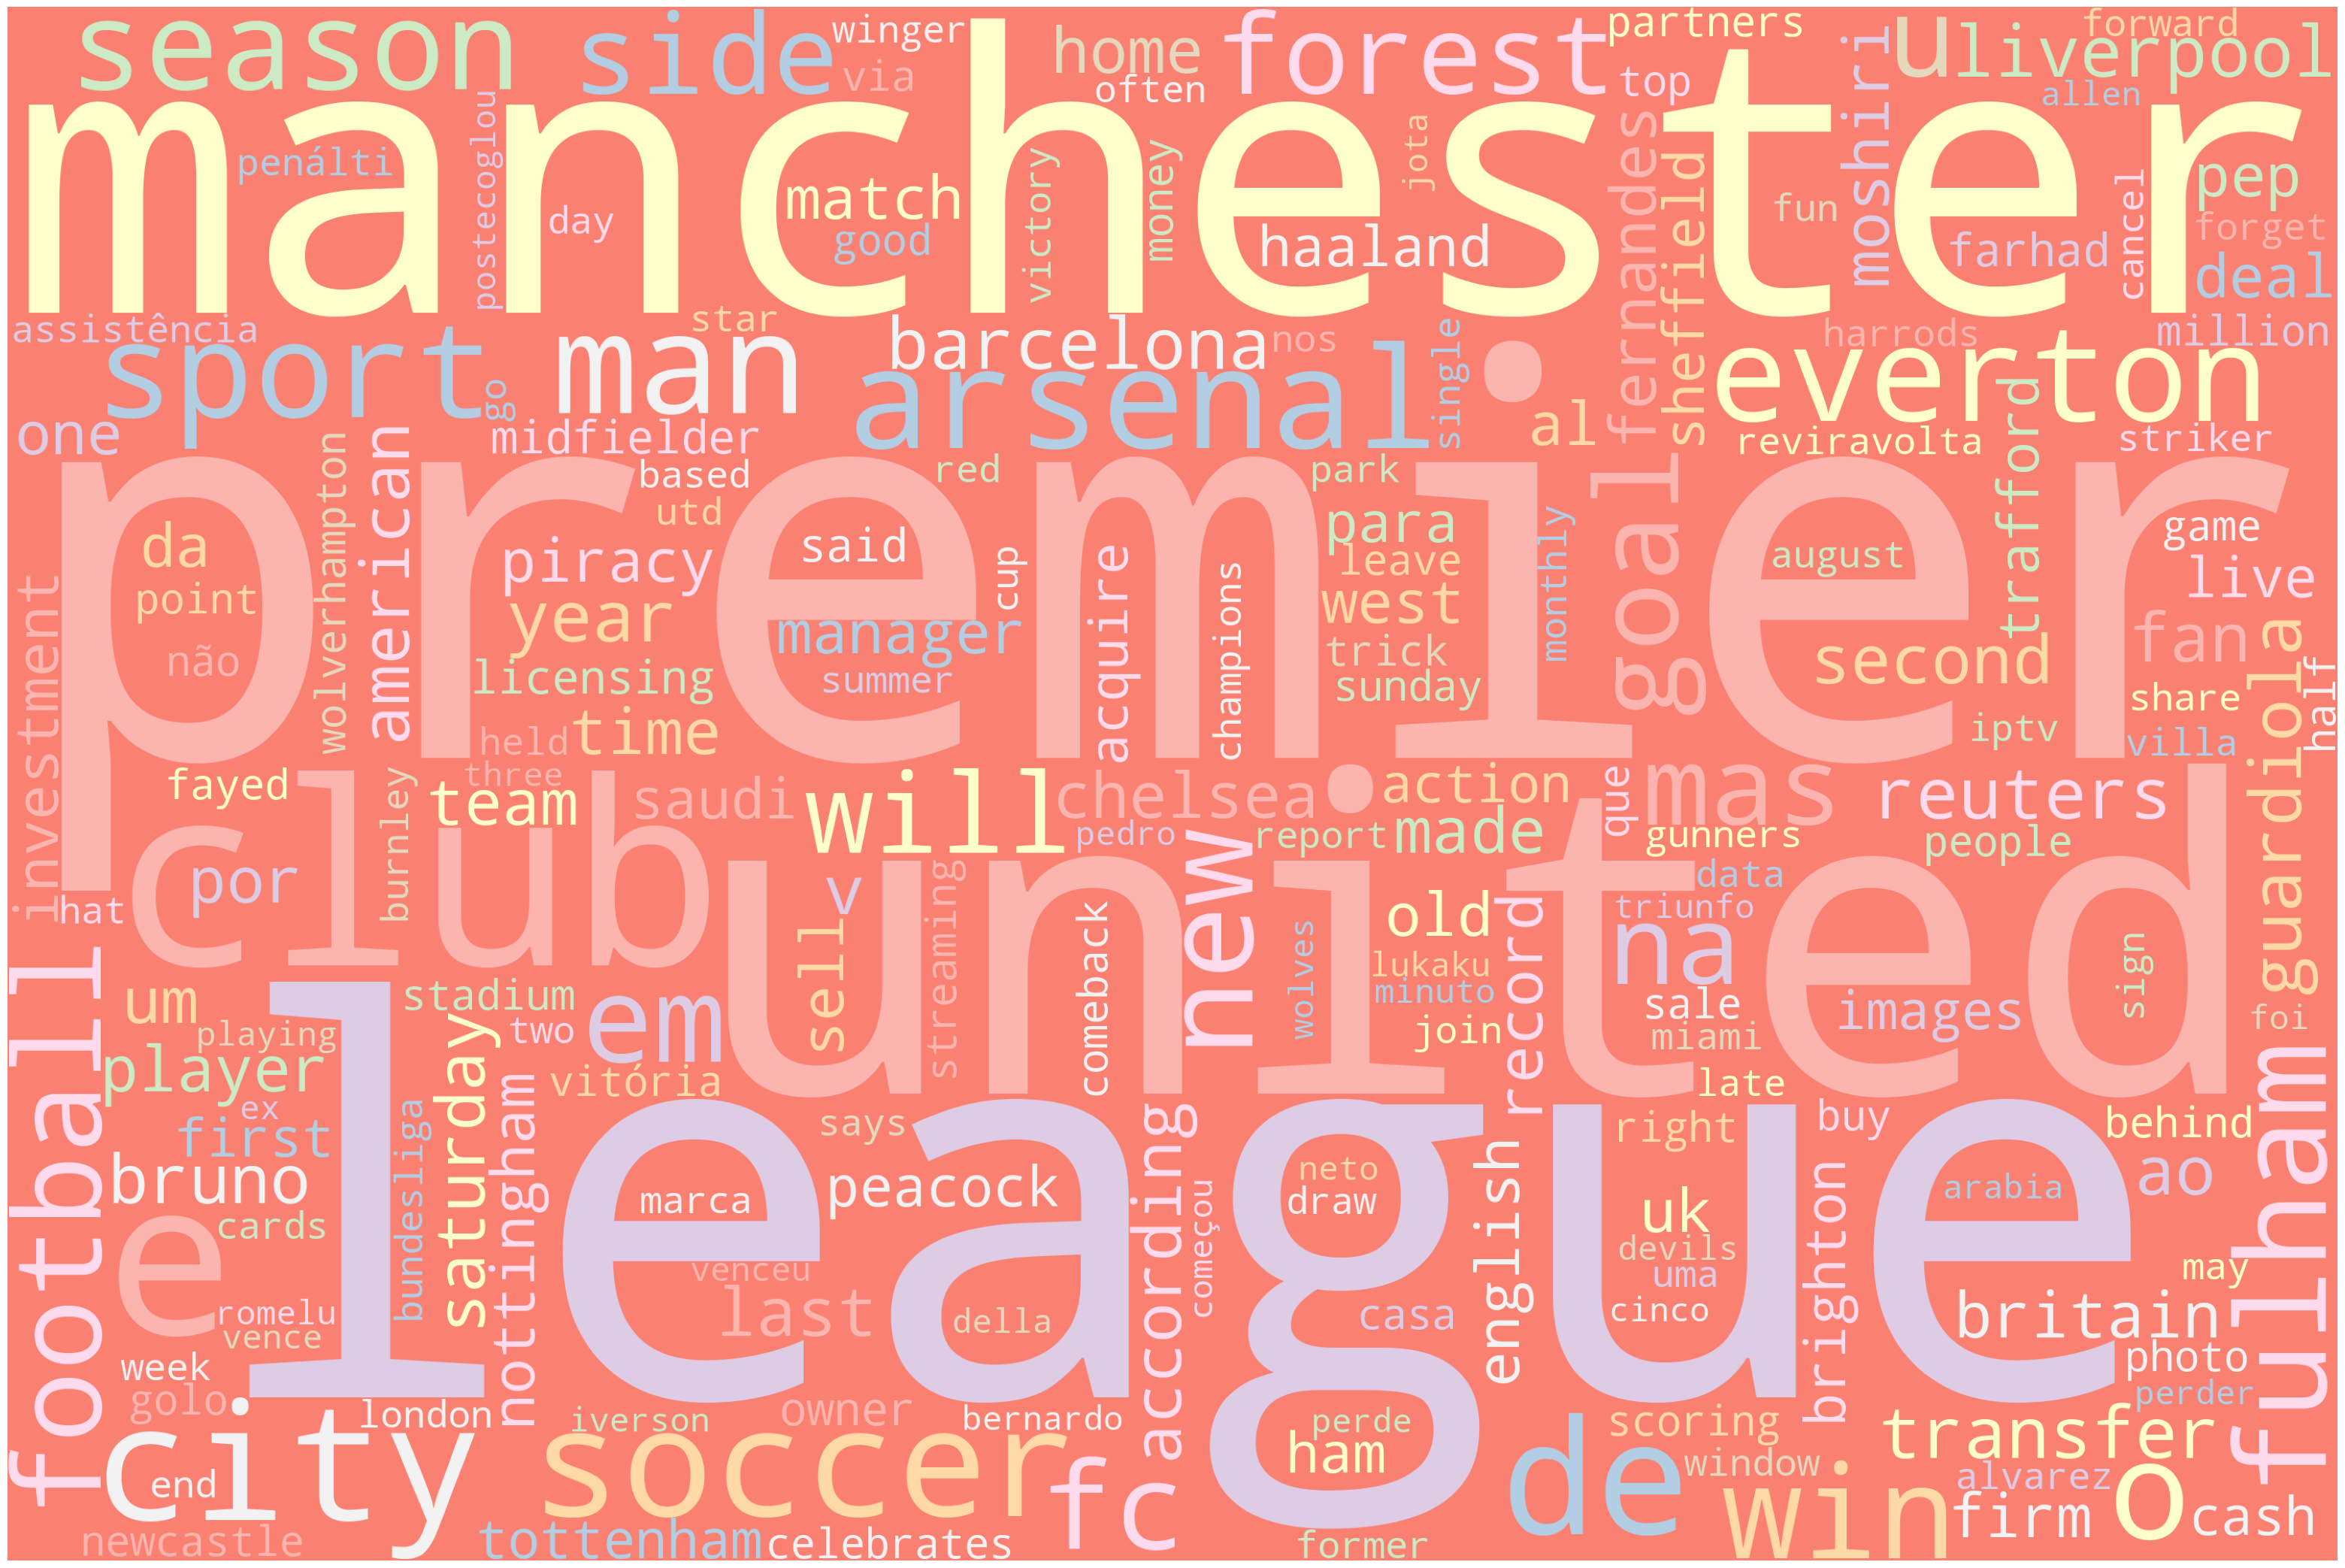

In [24]:
generate_word_cloud(Premier_League)